In [1]:
# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor



In [2]:
df = pd.read_csv('creditcard.csv',sep=',')

print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


/home/avi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


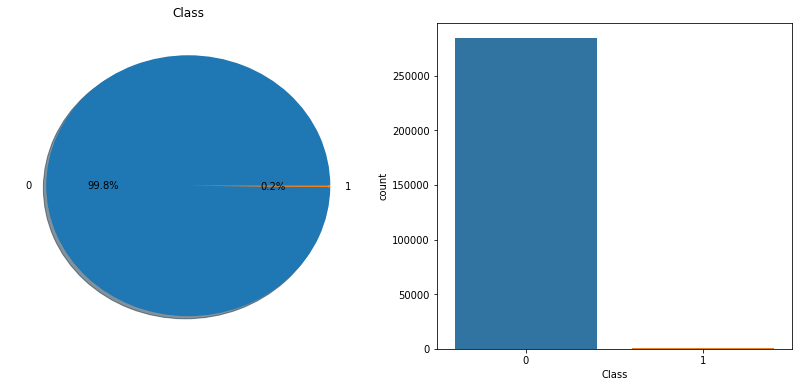

In [3]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')
sns.countplot('Class', data=df, ax=ax[1])
plt.show()

In [4]:

numeric_columns=(df.drop(['Class'],axis=1)).columns
numeric_columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

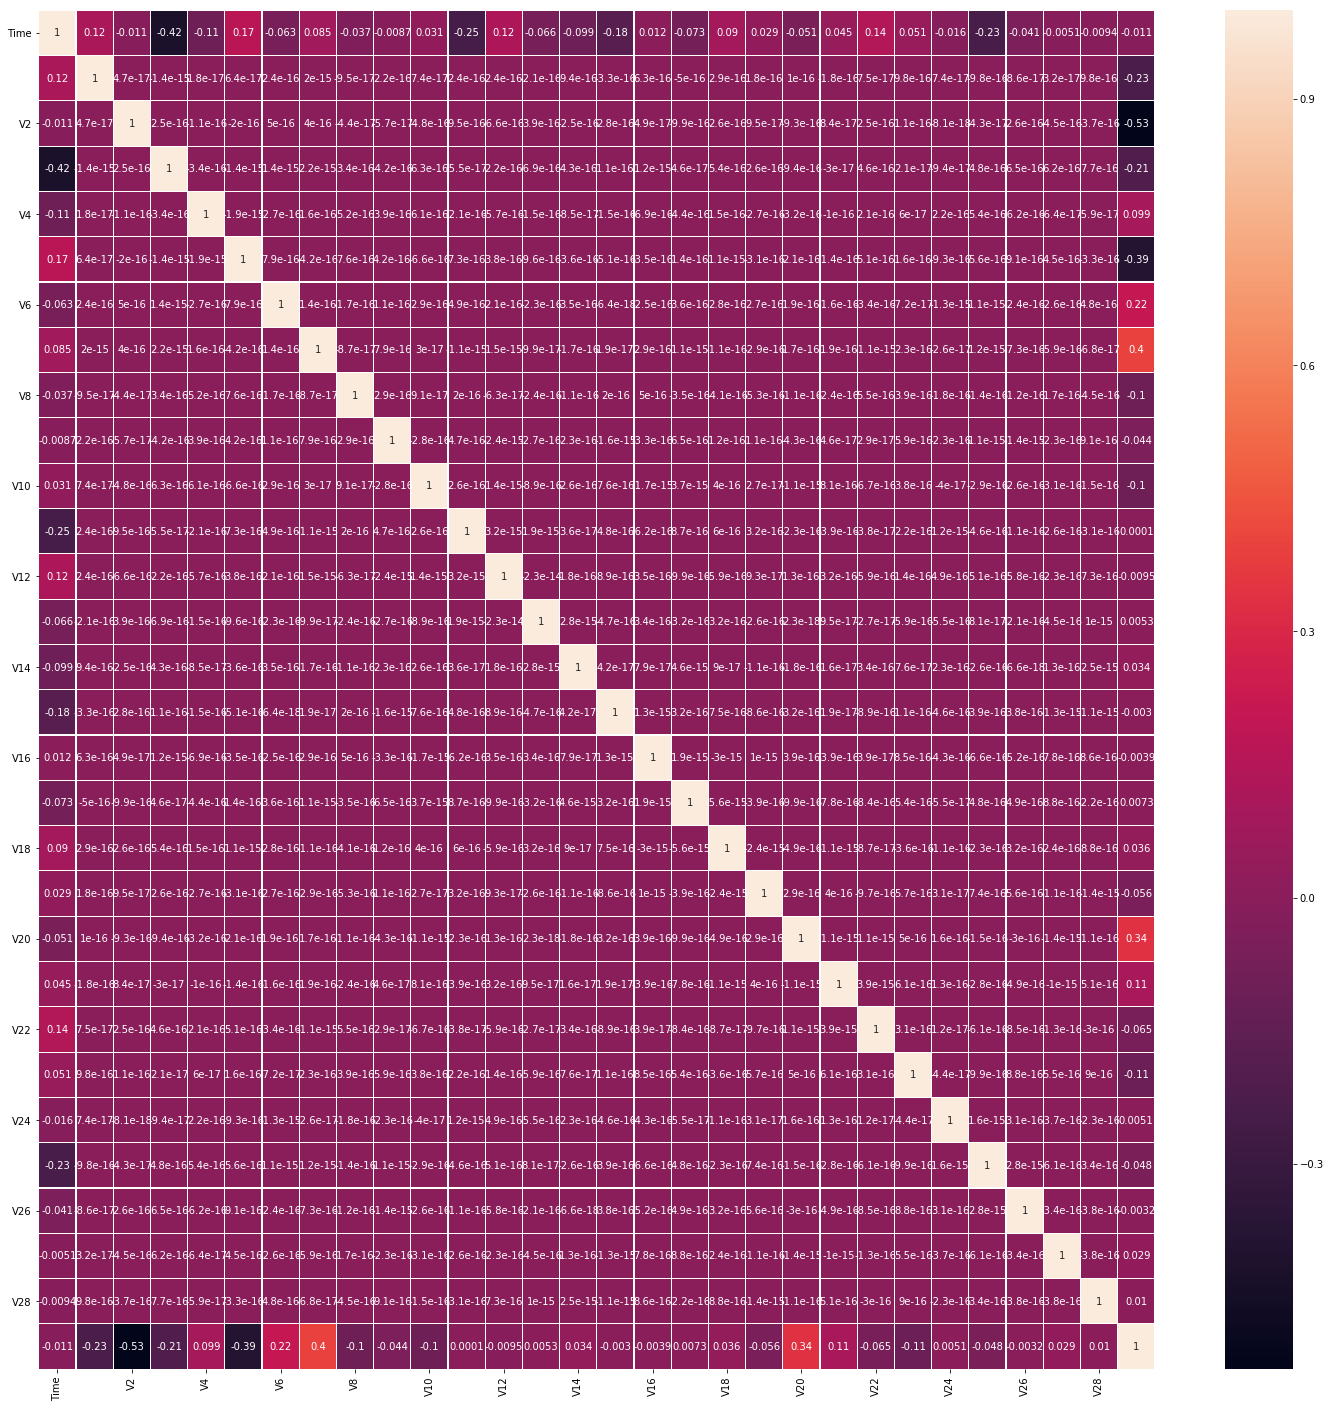

In [5]:
sns.heatmap(df[numeric_columns].corr(),annot=True, linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()

In [6]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [7]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))


train_set_x shape: (199364, 30)
train_set_y shape: (199364,)
test_set_x shape: (85443, 30)
test_set_y shape: (85443,)


In [8]:
y_train.value_counts()

0    199017
1       347
Name: Class, dtype: int64

In [9]:


Fraud=347
Valid=len(y_train)-Fraud

outlier_fraction = Fraud/Valid


In [10]:
outlier_fraction

0.0017435696448042128

In [11]:
clf=IsolationForest(n_estimators=110, max_samples=5500, contamination=outlier_fraction,random_state=42, verbose=0)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [12]:
def roc_out(y_test,y_pred_test):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr,'k--', lw=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    roc_auc_score(y_test,y_pred_test)

In [11]:
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train== -1] = 1
n_errors = (y_pred_train != y_train).sum()
# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

NameError: name 'y_pred_train' is not defined

In [14]:

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test== -1] = 1
n_errors = (y_pred_test != y_test).sum()
# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred_test))
print("Classification Report :")
print(classification_report(y_test,y_pred_test))

IsolationForest(bootstrap=False, contamination=0.0017435696448042128,
        max_features=1.0, max_samples=5500, n_estimators=110, n_jobs=1,
        random_state=42, verbose=0): 198
Accuracy Score :
0.997682665637
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85298
          1       0.33      0.37      0.35       145

avg / total       1.00      1.00      1.00     85443



In [15]:
from scipy import stats
stats.ks_2samp(y_test, y_pred_test)

Ks_2sampResult(statistic=0.00016385192467494036, pvalue=0.99999999999999933)

In [16]:
roc_auc_score(y_test,y_pred_test)

0.68213726966149513

In [17]:
roc_auc_score(y_train,y_pred_train)

0.6434691566687154

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_test)

0.34868421052631576

In [19]:
f1_score(y_train,y_pred_train)

0.28776978417266186

In [12]:
clf=LocalOutlierFactor(n_neighbors=9, algorithm='ball_tree', metric='minkowski',n_jobs=-1,p=2, metric_params=None, contamination=outlier_fraction)
y_pred_train = clf.fit_predict(X_train)
scores_prediction = clf.negative_outlier_factor_
y_pred_test=clf.fit_predict(X_test)

In [13]:
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train== -1] = 1
n_errors = (y_pred_train != y_train).sum()
# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

LocalOutlierFactor(algorithm='ball_tree', contamination=0.0017435696448042128,
          leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1,
          n_neighbors=9, p=2): 643
Accuracy Score :
0.996774743685
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199017
          1       0.07      0.07      0.07       347

avg / total       1.00      1.00      1.00    199364



In [14]:

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test== -1] = 1
n_errors = (y_pred_test != y_test).sum()
# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred_test))
print("Classification Report :")
print(classification_report(y_test,y_pred_test))

LocalOutlierFactor(algorithm='ball_tree', contamination=0.0017435696448042128,
          leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1,
          n_neighbors=9, p=2): 286
Accuracy Score :
0.996652739253
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85298
          1       0.03      0.03      0.03       145

avg / total       1.00      1.00      1.00     85443



In [15]:
Y_pred_test_score=clf.negative_outlier_factor_


In [16]:
roc_auc_score(y_train,y_pred_train)

0.53665500082762685

In [17]:
roc_auc_score(y_test,y_pred_test)

0.51294314213617009

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)


array([[85153,   145],
       [  141,     4]])

In [20]:
confusion_matrix(y_train,y_pred_train)

array([[198695,    322],
       [   321,     26]])

In [11]:
def  train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

Train accuracy: 100.00%
Test accuracy: 99.92%


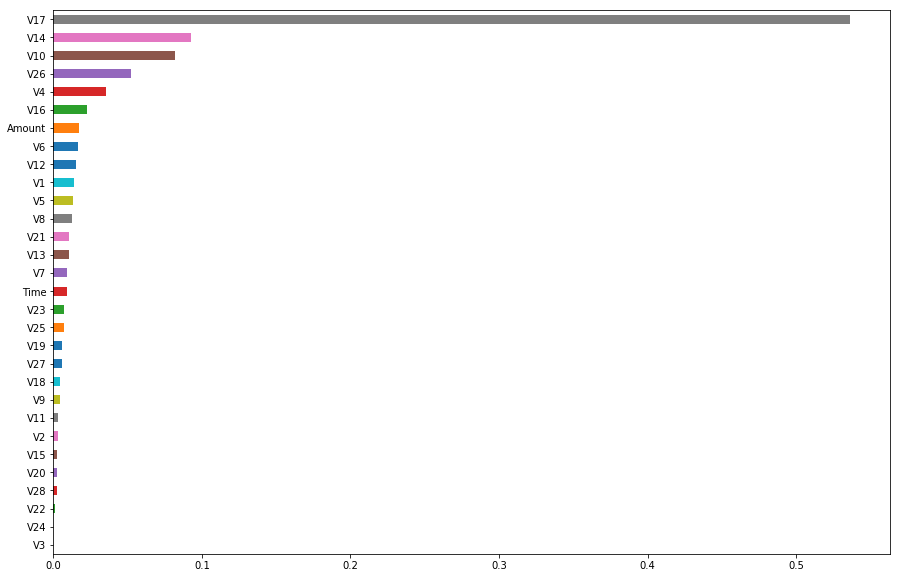

In [28]:
# Decision Tree# Decisi 
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

# plot feature importances
a=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot(kind='barh', figsize=(15,10))

In [29]:
# Check optimal 'max_depth' parameter
for i in range(1,15):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 99.91%
Test accuracy: 99.90%
max_depth = 2
Train accuracy: 99.93%
Test accuracy: 99.93%
max_depth = 3
Train accuracy: 99.93%
Test accuracy: 99.93%
max_depth = 4
Train accuracy: 99.95%
Test accuracy: 99.93%
max_depth = 5
Train accuracy: 99.96%
Test accuracy: 99.94%
max_depth = 6
Train accuracy: 99.97%
Test accuracy: 99.94%
max_depth = 7
Train accuracy: 99.97%
Test accuracy: 99.94%
max_depth = 8
Train accuracy: 99.97%
Test accuracy: 99.94%
max_depth = 9
Train accuracy: 99.98%
Test accuracy: 99.94%
max_depth = 10
Train accuracy: 99.98%
Test accuracy: 99.94%
max_depth = 11
Train accuracy: 99.98%
Test accuracy: 99.93%
max_depth = 12
Train accuracy: 99.98%
Test accuracy: 99.93%
max_depth = 13
Train accuracy: 99.98%
Test accuracy: 99.93%
max_depth = 14
Train accuracy: 99.98%
Test accuracy: 99.93%


Train accuracy: 99.99%
Test accuracy: 99.94%


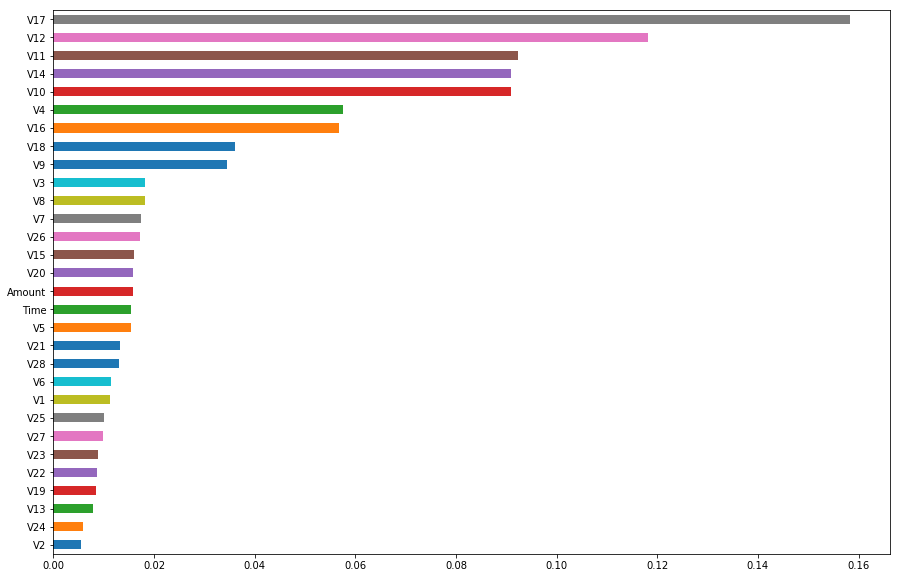

In [30]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot(kind="barh", figsize=(15,10))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') :  0.998384888171
no feature importances present
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85298
          1       1.00      0.05      0.09       145

avg / total       1.00      1.00      1.00     85443

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199017
          1       1.00      0.07      0.14       347

avg / total       1.00      1.00      1.00    199364

roc_score_training 0.537463976945
roc)score_testing 0.524137931034
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_f

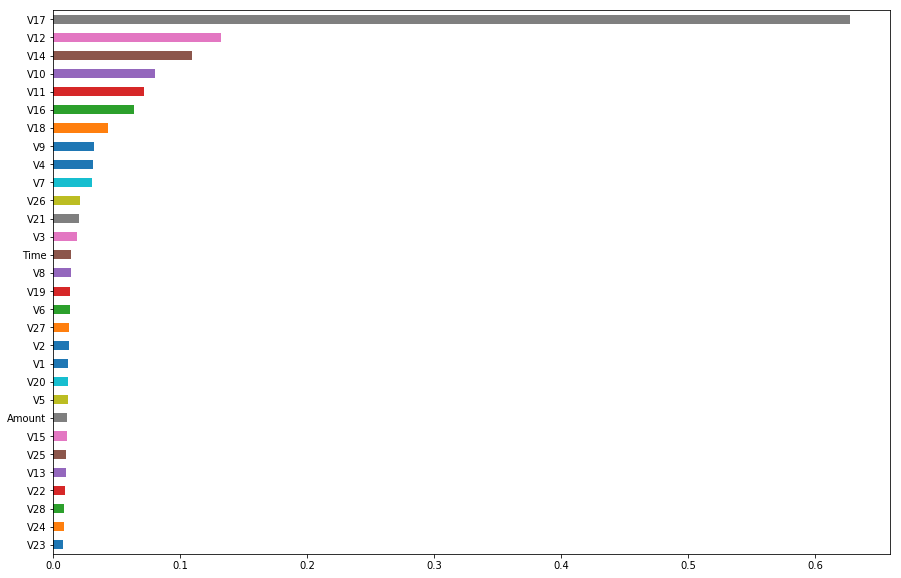

In [12]:

# initialize an empty list
accuracy = []
AUC_Score = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=8, random_state=2606), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    y_pred_train=model.predict(X_train)
    print(i ,': ', score)
    try:
        print(model.feature_importances_)
        pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot(kind="barh", figsize=(15,10))
    except:
        print ("no feature importances present")
    print("Classification Report :")
    print(classification_report(y_test,y_pred))
    print(classification_report(y_train,y_pred_train))
    print("roc_score_training",roc_auc_score(y_train,y_pred_train))
    print("roc)score_testing",roc_auc_score(y_test,y_pred))
    
    accuracy.append(score)

In [13]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_pred_train)

array([[199017,      0],
       [   321,     26]])

In [16]:
confusion_matrix(y_test,y_pred_test)

array([[85298,     0],
       [  138,     7]])